## PROJECT 1

**Loading libraries and the dataset**

In [37]:
#Loading the libraries
from tensorflow import keras 
import numpy as np
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
data_object=keras.datasets.imdb

In [3]:
#Train data and Test data
(train_data, train_labels),(test_data, test_labels)=data_object.load_data(num_words=10000)

**Analysing the dataset**

In [4]:
print('Input:',train_data[0],'\nOutput:',train_labels[0])

Input: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 
Output: 1


In [5]:
print('Input:',test_data[0],'\nOutput:',test_labels[0])

Input: [1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717] 
Output: 0


data_object is a Tokenizer object,it contains the word_index dictionary, which has the index values for each word (Token)

In [11]:
Word_Index=data_object.get_word_index()

In [14]:
Word_Index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [19]:
New_Word_Index = {}
for key, value in word_index.items():
    New_Word_Index[key]= value+3
New_Word_Index["<PAD>"] = 0
New_Word_Index["<start>"] = 1
New_Word_Index["<DOV>"] = 2

**Getting the dictionary to get the original sequence using indices sequence**

To get the text string out of index values we are getting dictionary with reverse values

In [20]:
Reverse_Word_Index = dict([( value,key) for (key, value) in New_Word_Index.items()])

In [21]:
def decode(index_list):
    txt=""
    for index in index_list:
        word = Reverse_Word_Index.get(index, "<DOV>")
        txt += " "+ word
    return txt

In [22]:
print(decode(train_data[0]))

 <start> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <DOV> is an amazing actor and now the same being director <DOV> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <DOV> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <DOV> to the two little boy's that played the <DOV> of norman and paul they were just brilliant children are often left out of the <DOV> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

**Padding the sequences to get all the rows of equal length**

In [24]:
train_data_1 = keras.preprocessing.sequence.pad_sequences(train_data, value=New_Word_Index["<PAD>"], padding="post",truncating='post', maxlen=300)

In [25]:
test_data_1 = keras.preprocessing.sequence.pad_sequences(test_data, value=New_Word_Index["<PAD>"],truncating='post', padding="post", maxlen=300)

Getting the original sequence using the indices sequence with padding

In [26]:
print(decode(train_data_1[0]))

 <start> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <DOV> is an amazing actor and now the same being director <DOV> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <DOV> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <DOV> to the two little boy's that played the <DOV> of norman and paul they were just brilliant children are often left out of the <DOV> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [27]:
train_labels[0]

1

**Shape of features**

In [28]:
print(train_data_1.shape)
print(test_data_1.shape)

(25000, 300)
(25000, 300)


**Designing the Sequential Model**

In [29]:
model=keras.Sequential()

model.add(keras.layers.Embedding(10000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16 , activation='relu'))
model.add(keras.layers.Dense(1 , activation="sigmoid"))

model.compile(optimizer="adam" , loss="binary_crossentropy" , metrics=['accuracy'])

In [30]:
history=model.fit(train_data_1, train_labels, epochs=30, batch_size=128,validation_split=0.3 ,verbose=1 )

Epoch 1/30
137/137 [==============================] - 2s 13ms/step - loss: 0.6862 - accuracy: 0.5823 - val_loss: 0.6676 - val_accuracy: 0.7253
Epoch 2/30
137/137 [==============================] - 2s 11ms/step - loss: 0.6118 - accuracy: 0.7571 - val_loss: 0.5432 - val_accuracy: 0.8141
Epoch 3/30
137/137 [==============================] - 2s 11ms/step - loss: 0.4624 - accuracy: 0.8510 - val_loss: 0.4143 - val_accuracy: 0.8493
Epoch 4/30
137/137 [==============================] - 2s 11ms/step - loss: 0.3529 - accuracy: 0.8802 - val_loss: 0.3464 - val_accuracy: 0.8743
Epoch 5/30
137/137 [==============================] - 2s 11ms/step - loss: 0.2928 - accuracy: 0.8969 - val_loss: 0.3188 - val_accuracy: 0.8764
Epoch 6/30
137/137 [==============================] - 2s 12ms/step - loss: 0.2552 - accuracy: 0.9080 - val_loss: 0.3005 - val_accuracy: 0.8815
Epoch 7/30
137/137 [==============================] - 2s 11ms/step - loss: 0.2284 - accuracy: 0.9195 - val_loss: 0.2885 - val_accuracy: 0.8867

In [31]:
evaluation=model.evaluate(test_data_1, test_labels)

782/782 [==============================] - 1s 2ms/step - loss: 0.5390 - accuracy: 0.8561


**Prediction of any sample**

In [39]:
print(decode(test_data_1[3]))

 <start> i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are <DOV> involved with the actions on the screen so then why the hell can't we have night vision <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P

In [40]:
print(test_labels[3])

0


In [53]:
prediction=(model.predict(test_data_1)>0.5)

In [50]:
prediction[:10]

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True]])

It can be seen that prediction[3] is 0

In [51]:
test_labels[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

**Prediction on a new comment**

In [54]:
New_review_comment="It's an excellent movie with good screenplay"

**Preprocessing the text**

In [58]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

In [60]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

stop = stopwords.words('english')
wl = WordNetLemmatizer()

In [61]:
def clean_text(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])
    return text

In [62]:
words=clean_text(New_review_comment).split()
words

['excellent', 'movie', 'good', 'screenplay']

**Encoding the text to index vector**

In [65]:
def encode(words):
    arr = []
    for word in words:
        arr.append(New_Word_Index.get(word, New_Word_Index["<DOV>"]))
        res=keras.preprocessing.sequence.pad_sequences([arr], value=New_Word_Index["<PAD>"], padding="post", truncating='post', maxlen=300)
    return res

In [66]:
encoded_text=encode(words)

In [67]:
encoded_text

array([[321,  20,  52, 881,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [69]:
prediction=model.predict(encoded_text)
prediction[0]>0.5

array([ True])

So the given comment is a positive review about the movie

## PROJECT 2

In [54]:
#Importing libraries
import pandas as pd
import numpy as np
import json
import nltk
import string
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import warnings
warnings.filterwarnings('ignore')

Defining a function to parse the data from json file

In [3]:
def parseJson(fname):
    for line in open(fname, 'r'):
        yield eval(line)

In [4]:
data = list(parseJson(r'C:\Users\200488052\Downloads\ML\GL\Projects\DL\NLP\Project2\Sarcasm_Headlines_Dataset.json'))

In [5]:
data

[{'is_sarcastic': 1,
  'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
  'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'},
 {'is_sarcastic': 0,
  'headline': 'dem rep. totally nails why congress is falling short on gender, racial equality',
  'article_link': 'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207'},
 {'is_sarcastic': 0,
  'headline': 'eat your veggies: 9 deliciously different recipes',
  'article_link': 'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html'},
 {'is_sarcastic': 1,
  'headline': 'inclement weather prevents liar from getting to work',
  'article_link': 'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031'},
 {'is_sarcastic': 1,
  'headline': "mother comes pretty close to using word 'streaming' correctly",
  'article_link': 'https://www.theonion.com/mother-comes-pretty-

In [6]:
#['is_sarcastic', 'headline', 'article_link']
dataset = pd.DataFrame(columns=['is_sarcastic', 'headline', 'article_link'])
for row in data:
    dataset=dataset.append(row,ignore_index=True)

In [7]:
dataset.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [8]:
len(dataset)

28619

The dataset has 28619 rows and 3 columns. We are dropping the article link as we consider only the headline as of now.

**Dropping the article link column**

In [10]:
dataset.drop('article_link',inplace=True,axis=1)

In [11]:
dataset['nb_words'] = dataset['headline'].apply(lambda x: len(x.split(' ')))

In [12]:
dataset

,is_sarcastic,headline,nb_words
0,1,thirtysomething scientists unveil doomsday clo...,8
1,0,dem rep. totally nails why congress is falling...,13
2,0,eat your veggies: 9 deliciously different recipes,7
3,1,inclement weather prevents liar from getting t...,8
4,1,mother comes pretty close to using word 'strea...,9
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,7
28615,1,internal affairs investigator disappointed con...,13
28616,0,the most beautiful acceptance speech this week...,12
28617,1,mars probe destroyed by orbiting spielberg-gat...,8


In [29]:
dataset['nb_words'].max()

151

The maximum length of a headline is 151

Checking any duplicates are present and dropping the duplicates

In [13]:
duplicates = dataset.duplicated()
dataset[duplicates]

,is_sarcastic,headline,nb_words
1780,1,willow rented,2
3978,1,all y'all urged to go fuck yo' selves,8
4771,0,sunday roundup,2
4904,1,tammys of the world demand to be taken seriously,9
5092,0,the funniest tweets from parents this week,7
...,...,...,...
28235,1,magical gallery transforms dull objects into art,7
28246,1,candy purchase puts yet more money in raisinet...,10
28449,1,congress raises killing age to 19,6
28456,1,rotating knife vortex closed pending safety in...,7


In [22]:
dataset.drop_duplicates(inplace=True)

**Checking whether data is imbalanced or not**

In [23]:
dataset.is_sarcastic.value_counts()

0    14951
1    13552
Name: is_sarcastic, dtype: int64

Dataset is not very imbalanced. Almost same number of positives and negatives exist

**Preprocessing the text**

In [32]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

In [33]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

stop = stopwords.words('english')
wl = WordNetLemmatizer()
punctuations = string.punctuation
special_characters = 'å¼«¥ª°©ð±§µæ¹¢³¿®ä£'

**Defining the text cleaning function**

In [34]:
def clean_text(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    text = text.translate(str.maketrans('', '', punctuations))
    text = text.translate(str.maketrans('', '', special_characters))
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])
    return text

In [40]:
dataset['Preprocessed']=dataset.headline.apply(lambda x:clean_text(x))

In [41]:
dataset

,is_sarcastic,headline,nb_words,Preprocessed
0,1,thirtysomething scientists unveil doomsday clo...,8,thirtysomething scientist unveil doomsday cloc...
1,0,dem rep. totally nails why congress is falling...,13,dem rep totally nail congress falling short ge...
2,0,eat your veggies: 9 deliciously different recipes,7,eat veggie deliciously different recipe
3,1,inclement weather prevents liar from getting t...,8,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,9,mother come pretty close using word streaming ...
...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,7,jew celebrate rosh hashasha something
28615,1,internal affairs investigator disappointed con...,13,internal affair investigator disappointed cons...
28616,0,the most beautiful acceptance speech this week...,12,beautiful acceptance speech week came queer ko...
28617,1,mars probe destroyed by orbiting spielberg-gat...,8,mar probe destroyed orbiting spielberggates sp...


**Frequency diagram of processed text words**

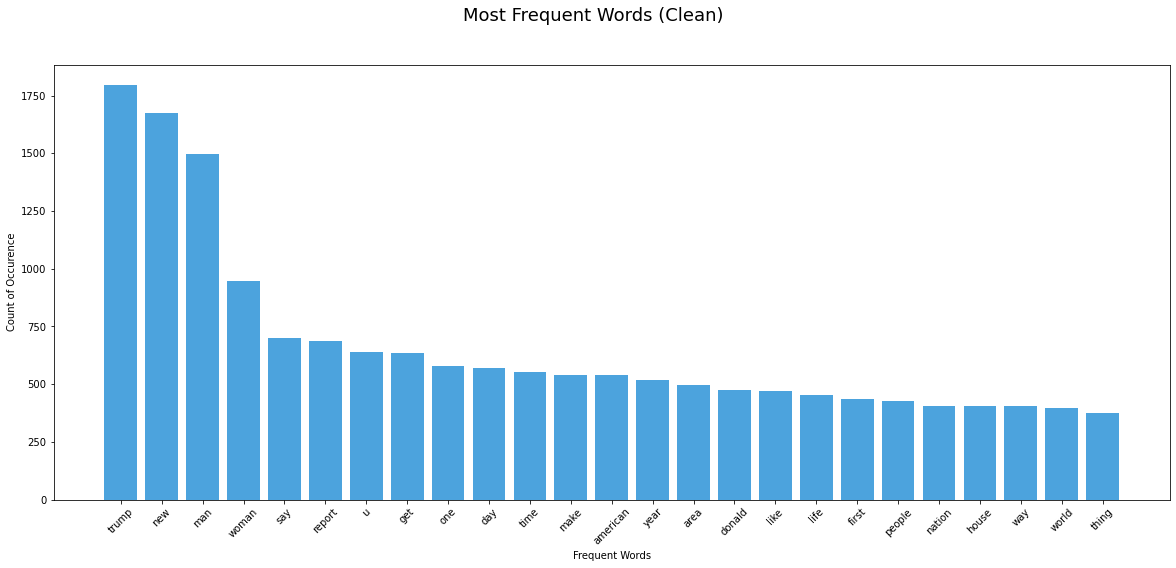

In [43]:
all_words = dataset['Preprocessed'].str.split(expand=True).unstack().value_counts()
plt.figure(figsize=(20,8))
plt.suptitle('Most Frequent Words (Clean)',fontsize =18)
plt.xlabel('Frequent Words')
plt.ylabel('Count of Occurence')
plt.bar(all_words[0:25].index,height = all_words[0:25],color = "#4CA3DD")
plt.grid(False)
plt.xticks(rotation=45)
plt.show();

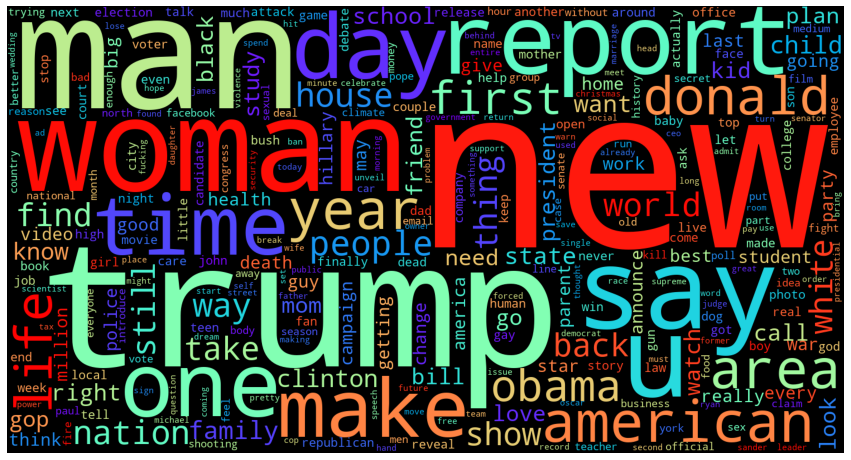

In [44]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(dataset['Preprocessed'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

**Creating features and labels**

In [134]:
# Select input and output features

X_text = dataset['Preprocessed']
y_text = dataset['is_sarcastic']

In [135]:
y_text = LabelEncoder().fit_transform(y_text)

In [136]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1)

print('X_text_train shape : ({0})'.format(X_text_train.shape))
print('y_text_train shape : ({0},)'.format(y_text_train.shape))
print('X_text_test shape : ({0})'.format(X_text_test.shape))
print('y_text_test shape : ({0},)'.format(y_text_test.shape))

X_text_train shape : ((22802,))
y_text_train shape : ((22802,),)
X_text_test shape : ((5701,))
y_text_test shape : ((5701,),)


In [137]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [138]:
dataset['nb_words_preprocessed'] = dataset['Preprocessed'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(dataset['nb_words_preprocessed'].min()))
print('Maximum number of words: {}'.format(dataset['nb_words_preprocessed'].max()))

Minimum number of words: 1
Maximum number of words: 106


The maximum number of words is 106. So maximum length of data will be considered as 110

In [139]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 110

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 22550


Total vocabulary is of size 22550

In [140]:
print('Indexing word vectors.')

embeddings_dictionary = {}
f = open('glove.6B.50d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dictionary[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_dictionary))

Indexing word vectors.
Found 400000 word vectors.


In [141]:
embedding_size = 50

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(22550, 50)

In [157]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, LSTM,  Embedding, Dropout, Bidirectional, GlobalMaxPool1D, BatchNormalization,Input
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score, classification_report

**Building a basic LSTM model**

In [148]:
base_model = Sequential()
base_model.add(Embedding(vocab_size, output_dim=embedding_size, weights=[embedding_matrix], input_length=110, trainable=False))
#LSTM 
base_model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
base_model.add(Dense(1, activation='sigmoid'))
base_model.compile(optimizer=Adam(lr = 0.001), loss='binary_crossentropy', metrics=['acc'])

In [149]:
base_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 110, 50)           1127500   
_________________________________________________________________
bidirectional_25 (Bidirectio (None, 256)               183296    
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 257       
Total params: 1,311,053
Trainable params: 183,553
Non-trainable params: 1,127,500
_________________________________________________________________


In [151]:
X_text_train.shape,y_text_train.shape,X_text_test.shape, y_text_test.shape

((22802, 110), (22802,), (5701, 110), (5701,))

In [152]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=0.001)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.001, patience=3, min_delta=1E-4)

# fit the keras model on the dataset
base_model_history = base_model.fit(X_text_train, y_text_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp])

Epoch 1/10
713/713 [==============================] - 1351s 2s/step - loss: 0.6330 - acc: 0.6370 - val_loss: 0.5919 - val_acc: 0.6885
Epoch 2/10
713/713 [==============================] - 1354s 2s/step - loss: 0.5911 - acc: 0.6784 - val_loss: 0.5617 - val_acc: 0.7157
Epoch 3/10
713/713 [==============================] - 1330s 2s/step - loss: 0.5690 - acc: 0.6995 - val_loss: 0.5601 - val_acc: 0.7097
Epoch 4/10
713/713 [==============================] - 1334s 2s/step - loss: 0.5583 - acc: 0.7069 - val_loss: 0.5345 - val_acc: 0.7348
Epoch 5/10
713/713 [==============================] - 1325s 2s/step - loss: 0.5423 - acc: 0.7167 - val_loss: 0.5284 - val_acc: 0.7367
Epoch 6/10
713/713 [==============================] - 1315s 2s/step - loss: 0.5364 - acc: 0.7218 - val_loss: 0.5202 - val_acc: 0.7411
Epoch 7/10
713/713 [==============================] - 1321s 2s/step - loss: 0.5297 - acc: 0.7269 - val_loss: 0.5124 - val_acc: 0.7471
Epoch 8/10
713/713 [==============================] - 1318s 2s

We got good accuracy score with the very basic model also

**Building an LSTM model with neural network included**

In [153]:
# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)

drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
#dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
#drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

#dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_2)
#drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(16, activation = 'relu')(drop_out_layer_2)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(1, activation='sigmoid')(drop_out_layer_5)

lstm_model = Model(inputs=deep_inputs, outputs=dense_layer_5)

opt = Adam(lr=0.001)
#opt = SGD(lr=0.001, momentum=0.9)
lstm_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

In [154]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.001, patience=3, min_delta=1E-4)

#metrics = Metrics(validation_data=(X_text_train, y_text_train))

# fit the keras model on the dataset
training_history = lstm_model.fit(X_text_train, y_text_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp])

Epoch 1/10
713/713 [==============================] - 433s 608ms/step - loss: 0.6587 - acc: 0.6021 - val_loss: 0.6057 - val_acc: 0.6681
Epoch 2/10
713/713 [==============================] - 454s 637ms/step - loss: 0.5985 - acc: 0.6857 - val_loss: 0.5635 - val_acc: 0.7193
Epoch 3/10
713/713 [==============================] - 440s 618ms/step - loss: 0.5555 - acc: 0.7197 - val_loss: 0.5326 - val_acc: 0.7336
Epoch 4/10
713/713 [==============================] - 410s 575ms/step - loss: 0.5278 - acc: 0.7401 - val_loss: 0.5133 - val_acc: 0.7460
Epoch 5/10
713/713 [==============================] - 431s 605ms/step - loss: 0.5117 - acc: 0.7514 - val_loss: 0.5056 - val_acc: 0.7511
Epoch 6/10
713/713 [==============================] - 422s 591ms/step - loss: 0.4883 - acc: 0.7670 - val_loss: 0.4913 - val_acc: 0.7548
Epoch 7/10
713/713 [==============================] - 443s 621ms/step - loss: 0.4749 - acc: 0.7734 - val_loss: 0.4910 - val_acc: 0.7525
Epoch 8/10
713/713 [============================

In [155]:
# evaluate the keras model
_, train_accuracy = lstm_model.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
_, test_accuracy = lstm_model.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 83.61
Test accuracy: 76.57


Train accuracy is 83.61 and test accuracy is 76. It appears like overfit. But not very much and we have good validation accuracy

In [159]:
prediction=(lstm_model.predict(X_text_test)>0.5)

In [160]:
print(classification_report(y_text_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      3035
           1       0.77      0.71      0.74      2666

    accuracy                           0.77      5701
   macro avg       0.77      0.76      0.76      5701
weighted avg       0.77      0.77      0.76      5701



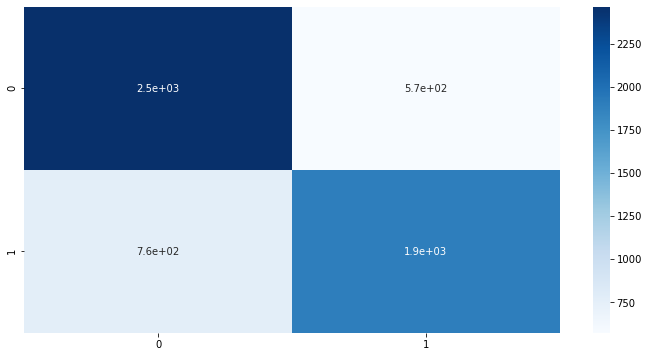

In [161]:
cm = confusion_matrix(y_text_test,prediction)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, cmap='Blues');

A good recall ratio of 0.77 and F1 score of 76 are acheived.